#  Deep Learning(ANN - Artifical Neural Network) Project with KC_House_dataset

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Read Dataset

In [2]:
df = pd.read_csv("kc_house_data.csv")

# Data Preparation

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.00,4580474287.77,2876735715.75,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00
price,21597.00,540296.57,367368.14,78000.00,322000.00,450000.00,645000.00,7700000.00
bedrooms,21597.00,3.37,0.93,1.00,3.00,3.00,4.00,33.00
bathrooms,21597.00,2.12,0.77,0.50,1.75,2.25,2.50,8.00
sqft_living,21597.00,2080.32,918.11,370.00,1430.00,1910.00,2550.00,13540.00
sqft_lot,21597.00,15099.41,41412.64,520.00,5040.00,7618.00,10685.00,1651359.00
floors,21597.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21597.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21597.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21597.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


# Visulazations

In [8]:
#sns.pairplot(df)

In [9]:
def plot_hist(variable):
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

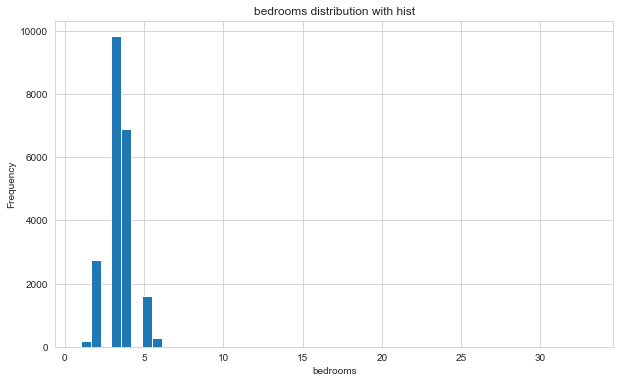

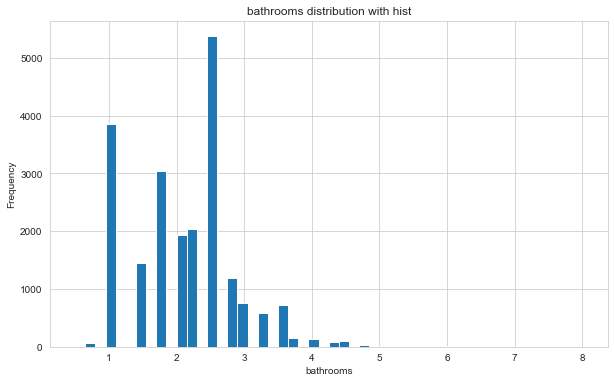

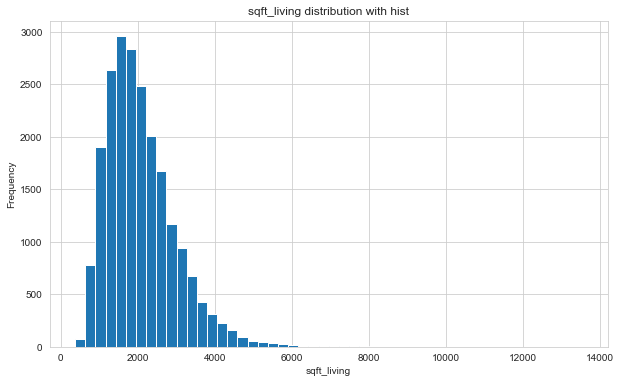

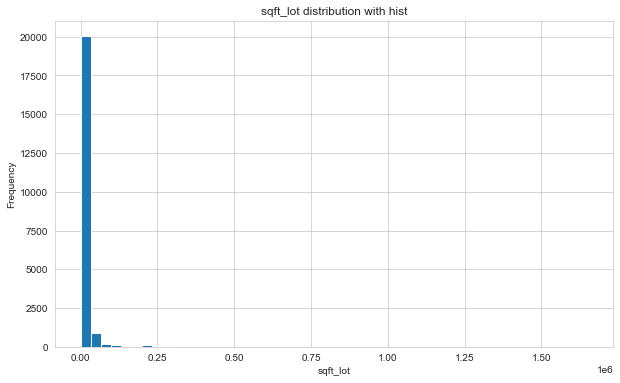

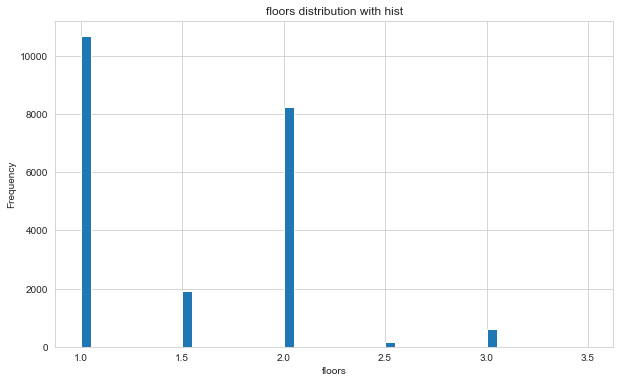

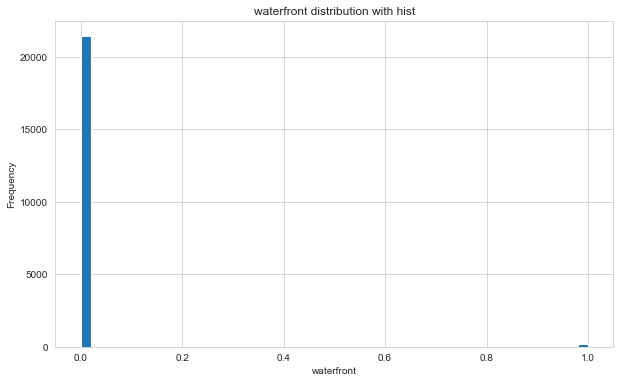

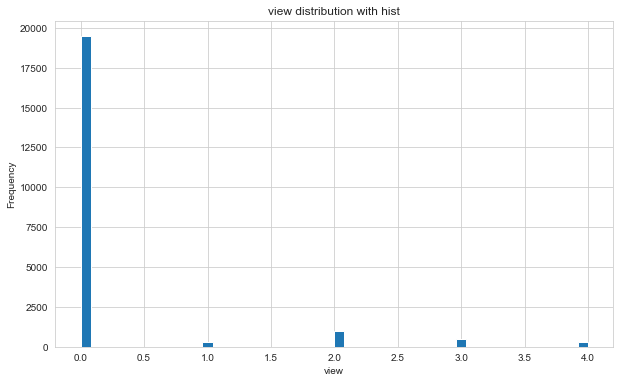

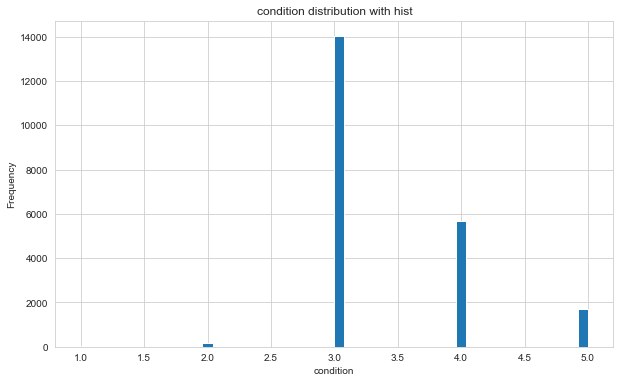

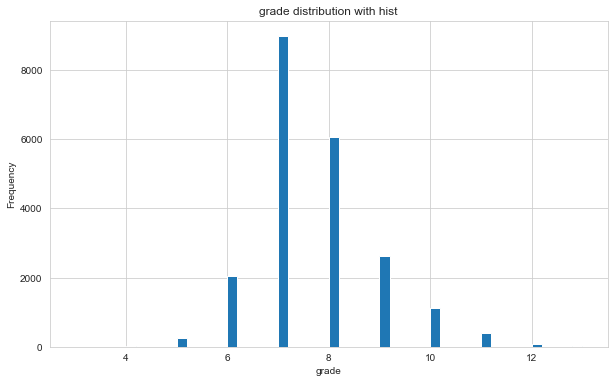

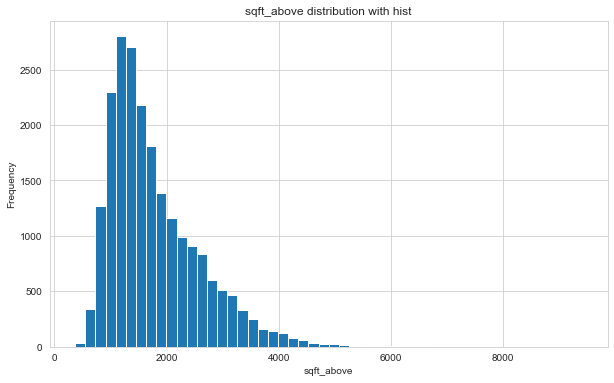

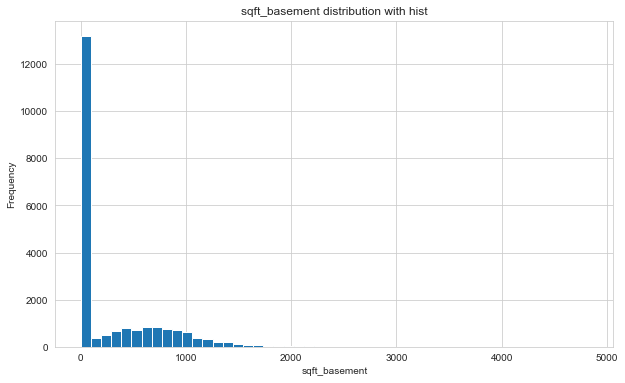

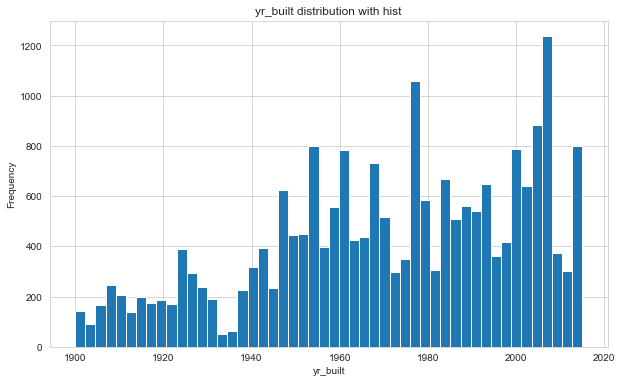

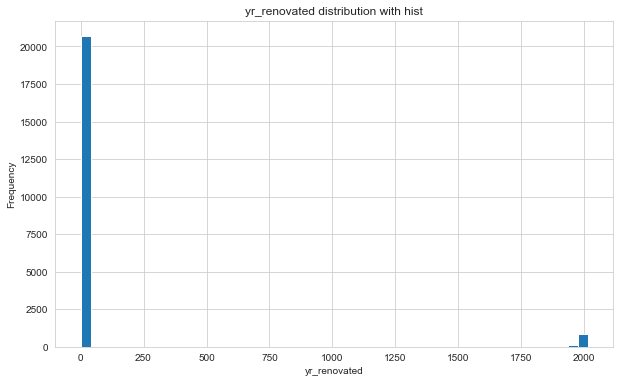

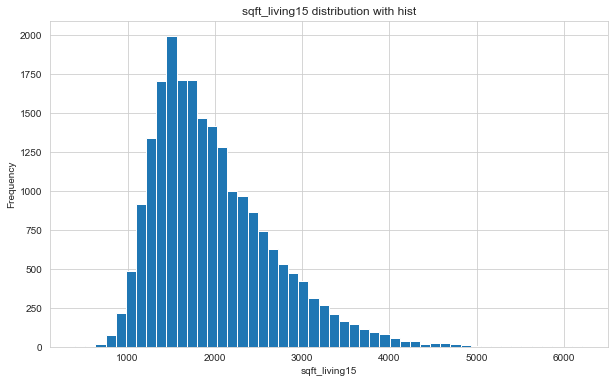

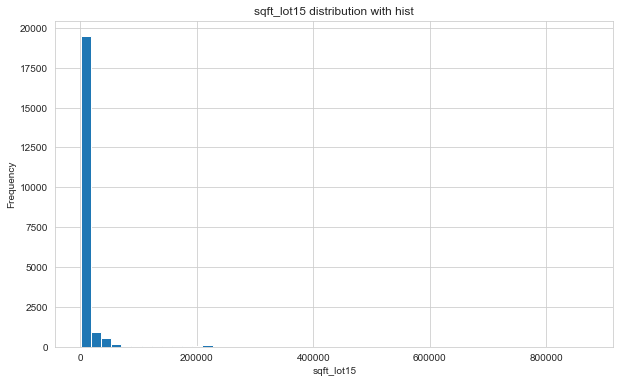

In [10]:
numericVar = df.drop(columns = ["id", "date", "zipcode", "lat", "long","price"])
for n in numericVar:
    plot_hist(n)

## Data on the Map

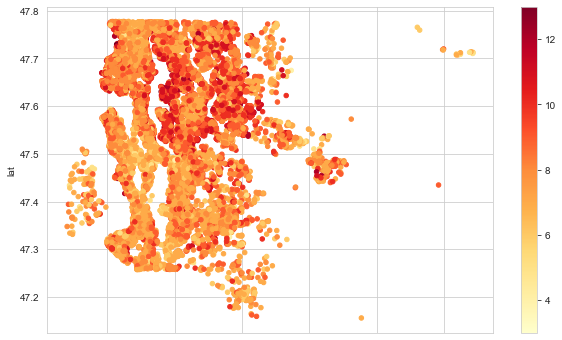

In [11]:
df.plot(x="long", y="lat", kind="scatter", c=df.grade, colormap="YlOrRd");

In [12]:
#!pip install geopandas
import geopandas as gpd

In [13]:
import sys
'geopandas' in sys.modules

True

In [14]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


# Statistical Analysis

In [15]:
will_delete= ["id", "date", "zipcode", "lat", "long"]

In [16]:
#Belirlediğimiz sütunları siliyoruz.
df.drop(columns = will_delete, inplace= True)

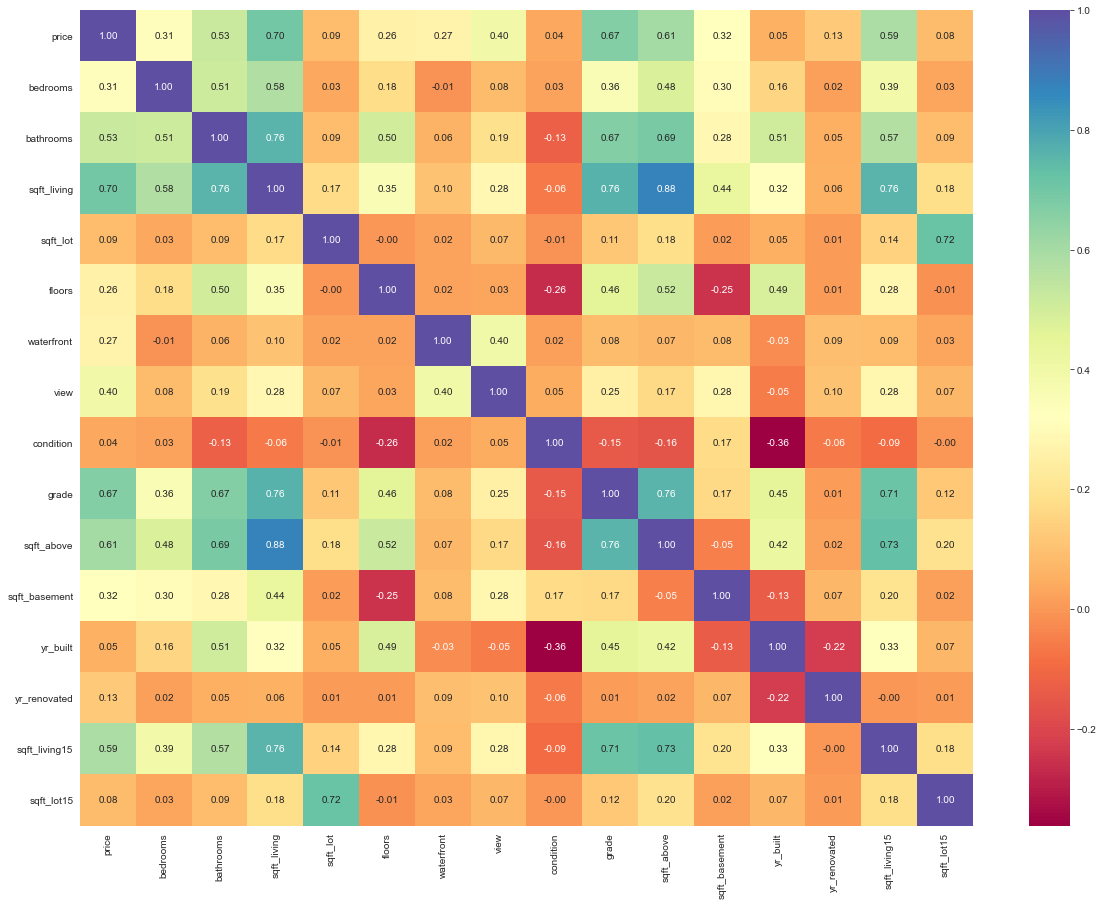

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Spectral");

In [18]:
corr = df.corr().price
corr[np.argsort(corr, axis= 0)[:-1]]

condition       0.04
yr_built        0.05
sqft_lot15      0.08
sqft_lot        0.09
yr_renovated    0.13
floors          0.26
waterfront      0.27
bedrooms        0.31
sqft_basement   0.32
view            0.40
bathrooms       0.53
sqft_living15   0.59
sqft_above      0.61
grade           0.67
sqft_living     0.70
Name: price, dtype: float64

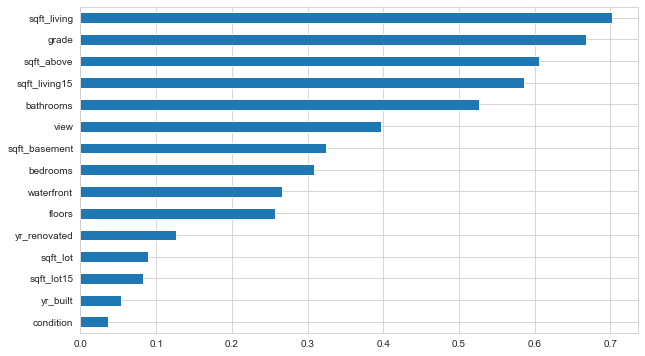

In [19]:
df.corr()['price'].drop('price').sort_values().plot.barh();

# Determine Dependent and Independent Variables

In [20]:
X = df.drop(columns = ["price"]).values
y = df.price.values

In [21]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 0.000e+00, 1.340e+03,
        5.650e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 1.991e+03, 1.690e+03,
        7.639e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 0.000e+00, 2.720e+03,
        8.062e+03],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        2.007e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 0.000e+00, 1.410e+03,
        1.287e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        1.357e+03]])

In [22]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

## Train - Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 42)

In [24]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (19437, 15)
X_test : (2160, 15)
y_train : (19437,)
y_test : (2160,)


In [25]:
X_train

array([[3.0000e+00, 1.7500e+00, 1.3000e+03, ..., 0.0000e+00, 1.0900e+03,
        5.1240e+03],
       [3.0000e+00, 1.0000e+00, 1.3700e+03, ..., 0.0000e+00, 1.7680e+03,
        8.7020e+03],
       [3.0000e+00, 3.0000e+00, 3.2500e+03, ..., 0.0000e+00, 2.8200e+03,
        7.7520e+03],
       ...,
       [4.0000e+00, 1.5000e+00, 1.5300e+03, ..., 0.0000e+00, 1.5200e+03,
        8.5000e+03],
       [1.0000e+00, 7.5000e-01, 3.8000e+02, ..., 0.0000e+00, 1.1700e+03,
        1.5000e+04],
       [4.0000e+00, 2.5000e+00, 2.7550e+03, ..., 0.0000e+00, 2.8200e+03,
        1.2831e+04]])

## ANN (Artifical Neural Network)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [27]:
model = Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu")) 
model.add(Dense(units = 8, activation = "relu")) 
model.add(Dense(units = 8, activation = "relu")) # input_dim = 2 or input_dim = X_train.shape[0]
model.add(Dense(units = 8, activation = "relu")) 
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu")) 
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(1))

In [28]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [29]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
608/608 [==============================] - 3s 2ms/step - loss: 336180248576.0000
Epoch 2/250
608/608 [==============================] - 1s 2ms/step - loss: 116118405120.0000
Epoch 3/250
608/608 [==============================] - 1s 2ms/step - loss: 77771833344.0000
Epoch 4/250
608/608 [==============================] - 1s 2ms/step - loss: 72754241536.0000
Epoch 5/250
608/608 [==============================] - 1s 2ms/step - loss: 69778817024.0000
Epoch 6/250
608/608 [==============================] - 1s 2ms/step - loss: 68353933312.0000
Epoch 7/250
608/608 [==============================] - 1s 2ms/step - loss: 67557666816.0000
Epoch 8/250
608/608 [==============================] - 1s 2ms/step - loss: 67498196992.0000
Epoch 9/250
608/608 [==============================] - 1s 2ms/step - loss: 67172421632.0000
Epoch 10/250
608/608 [==============================] - 1s 2ms/step - loss: 67128938496.0000
Epoch 11/250
608/608 [==============================] - 1s 2ms/step - loss: 6

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 128       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [31]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(15, 8) dtype=float32, numpy=
 array([[-8.57119179e+00,  7.42965698e+00, -4.90525913e+00,
         -7.03581905e+00, -4.02483284e-01, -2.82648563e-01,
         -7.48316717e+00,  7.91809750e+00],
        [ 2.48295236e+00, -2.52311301e+00,  3.82296777e+00,
          3.33458257e+00, -1.11521870e-01, -3.65880311e-01,
          1.98656571e+00, -2.38335896e+00],
        [ 1.18987215e+00,  9.01871443e-01,  1.10945880e+00,
          1.04448676e+00,  3.59761238e-01,  1.05444193e-01,
          7.03095496e-01,  3.42912525e-01],
        [ 3.37146856e-02, -9.66261327e-02,  2.27571219e-01,
          4.18879464e-02, -2.20820516e-01, -1.27921432e-01,
          1.00511238e-01,  6.24414742e-01],
        [-5.75999282e-02,  1.66287899e+00, -1.10405064e+00,
         -9.22414005e-01, -4.44596857e-01, -1.54608876e-01,
          2.56144953e+00,  4.16787505e-01],
        [ 4.08655701e+01, -3.23252411e+01,  3.31664734e+01,
          3.82101440e+01, -4.38386202e-03,  4.1898101

In [32]:
model.history.history

{'loss': [336180248576.0,
  116118405120.0,
  77771833344.0,
  72754241536.0,
  69778817024.0,
  68353933312.0,
  67557666816.0,
  67498196992.0,
  67172421632.0,
  67128938496.0,
  67125493760.0,
  67133972480.0,
  67044913152.0,
  67018027008.0,
  67033968640.0,
  66863071232.0,
  66758021120.0,
  67234807808.0,
  66700120064.0,
  66745237504.0,
  66650394624.0,
  66541092864.0,
  66608046080.0,
  66387435520.0,
  66385874944.0,
  66366132224.0,
  66303660032.0,
  66121166848.0,
  65922289664.0,
  65875591168.0,
  65993326592.0,
  65563553792.0,
  65417920512.0,
  64920272896.0,
  64875520000.0,
  64430559232.0,
  63733252096.0,
  63437987840.0,
  62899597312.0,
  62032076800.0,
  60966338560.0,
  60755718144.0,
  60007968768.0,
  60059107328.0,
  59778535424.0,
  59568599040.0,
  59051823104.0,
  58948145152.0,
  58303705088.0,
  58073952256.0,
  57628708864.0,
  56983179264.0,
  56849920000.0,
  56671567872.0,
  56518385664.0,
  56407199744.0,
  56431202304.0,
  56309534720.0,
  56

In [33]:
pd.DataFrame(model.history.history)

,loss
0,336180248576.00
1,116118405120.00
2,77771833344.00
3,72754241536.00
4,69778817024.00
...,...
245,48873299968.00
246,49294528512.00
247,48908820480.00
248,48856899584.00


<AxesSubplot:>

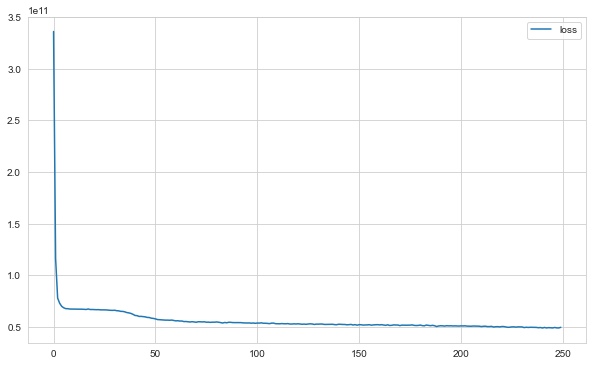

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 500000000000.0)

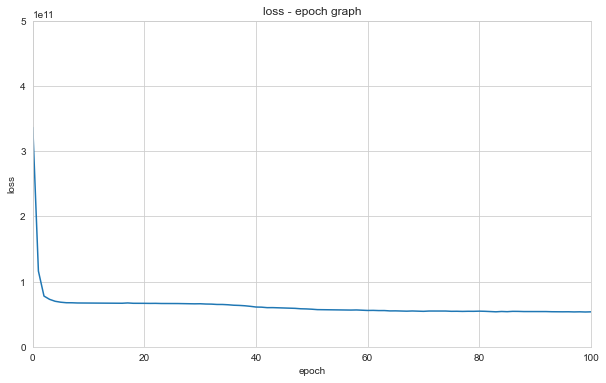

In [35]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 100]) # focusing on the given x values
ax.set_ylim([0, 5e11]) # focusing on the given y value

## Evaluate Models

#### Model Performance

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [37]:
model.evaluate(X_train, y_train, verbose= 0)

49443528704.0

In [38]:
model.evaluate(X_test, y_test, verbose= 0)

50150674432.0

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_train_pred = model.predict(X_train)

In [41]:
explained_variance_score(y_test, y_pred)

0.570149191744526

In [42]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
1047,2230000.00,1201760.25
1420,440000.00,448254.88
2000,815000.00,848292.69
216,1400000.00,930626.31
1411,290000.00,100744.91
2146,385000.00,255379.58
2121,470000.00,444891.69
1391,375950.00,328956.78
412,350000.00,362981.34
1046,390000.00,516924.53


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

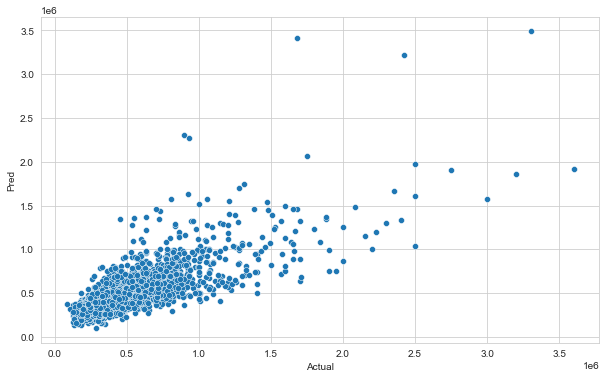

In [43]:
sns.scatterplot(x = "Actual", y = "Pred", data = compare)

In [44]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [45]:
eval_metric(y_train, y_train_pred)

r2_score: 0.6393767625478628 
mae: 143776.8918573468 
mse: 49443527232.75969 
rmse: 222359.00528820435


In [46]:
eval_metric(y_test, y_pred)

r2_score: 0.5660050749894443 
mae: 148187.20103081598 
mse: 50150679697.810616 
rmse: 223943.47433629454


## Deployment Model and Predict Fake Data

#### Final Model and Model Deployment

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler().fit(X)

In [49]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", "wb"))

In [50]:
X_scaled = scaler.transform(X)

In [51]:
final_model = Sequential()

final_model.add(Dense(units= 4, activation= "relu"))
final_model.add(Dense(units= 4, activation= "relu"))
final_model.add(Dense(units= 4, activation= "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size= 32, epochs= 250)

Epoch 1/250
675/675 [==============================] - 3s 3ms/step - loss: 426865491968.0000: 0s - loss: 42989
Epoch 2/250
675/675 [==============================] - 2s 3ms/step - loss: 426723868672.0000
Epoch 3/250
675/675 [==============================] - 2s 3ms/step - loss: 426033577984.0000
Epoch 4/250
675/675 [==============================] - 2s 3ms/step - loss: 424019230720.0000
Epoch 5/250
675/675 [==============================] - 2s 3ms/step - loss: 419573235712.0000
Epoch 6/250
675/675 [==============================] - 2s 3ms/step - loss: 411392180224.0000
Epoch 7/250
675/675 [==============================] - 1s 2ms/step - loss: 397781532672.0000
Epoch 8/250
675/675 [==============================] - 2s 3ms/step - loss: 377151881216.0000
Epoch 9/250
675/675 [==============================] - 2s 2ms/step - loss: 348276031488.0000
Epoch 10/250
675/675 [==============================] - 2s 2ms/step - loss: 310737698816.0000
Epoch 11/250
675/675 [=============================

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save("model_fake_reg.h5")

#### Prediction

In [63]:
model_fake_reg = load_model("model_fake_reg.h5")

In [64]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [65]:
my_dict = {"bedrooms" : [3,5,3,3,4], "bathrooms" : [1,3,1,1,2], "sqft_living" : [750, 1250, 600, 550, 1100], 
            "sqft_lot": [3500, 5600, 3200, 2400, 4750], "floors" : [1, 1, 2, 2, 1 ], "waterfront" : [0, 1, 0, 0, 0 ],
            "view" : [0, 1, 0, 1, 0], "condition" : [1, 3, 4, 3, 5], "grade" : [7, 9, 5, 3, 2], 
            "sqft_above":[750, 1250, 600, 550, 1100], "sqft_basement" : [750, 950, 600, 500, 750], 
            "yr_built" : [1986, 1992, 2002, 1959, 2010],  "yr_renovated" : [2008, 0, 0, 1998, 0 ], 
            "sqft_living15" : [900, 1750, 825, 932, 1400],"sqft_lot15" : [3500, 5600, 3200, 2400, 4750]}

In [66]:
sample = pd.DataFrame(my_dict)
sample

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1,750,3500,1,0,0,1,7,750,750,1986,2008,900,3500
1,5,3,1250,5600,1,1,1,3,9,1250,950,1992,0,1750,5600
2,3,1,600,3200,2,0,0,4,5,600,600,2002,0,825,3200
3,3,1,550,2400,2,0,1,3,3,550,500,1959,1998,932,2400
4,4,2,1100,4750,1,0,0,5,2,1100,750,2010,0,1400,4750


In [67]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[ 0.0625    ,  0.06666667,  0.02885345,  0.00180514,  0.        ,
         0.        ,  0.        ,  0.        ,  0.4       ,  0.0420354 ,
         0.15560166,  0.74782609,  0.99652605,  0.0862158 ,  0.00327265],
       [ 0.125     ,  0.33333333,  0.06681853,  0.00307722,  0.        ,
         1.        ,  0.25      ,  0.5       ,  0.6       ,  0.09734513,
         0.19709544,  0.8       ,  0.        ,  0.2324901 ,  0.00568492],
       [ 0.0625    ,  0.06666667,  0.01746393,  0.00162342,  0.4       ,
         0.        ,  0.        ,  0.75      ,  0.2       ,  0.02544248,
         0.12448133,  0.88695652,  0.        ,  0.07330924,  0.00292804],
       [ 0.0625    ,  0.06666667,  0.01366743,  0.00113881,  0.4       ,
         0.        ,  0.25      ,  0.5       ,  0.        ,  0.0199115 ,
         0.10373444,  0.51304348,  0.99156328,  0.0917226 ,  0.00200908],
       [ 0.09375   ,  0.2       ,  0.05542901,  0.00256233,  0.        ,
         0.        ,  0.        ,  1.        , 

In [68]:
model_fake_reg.predict(sample_scaled)

array([[1854.6605],
       [9455.008 ],
       [3095.0325],
       [3630.0293],
       [3041.4304]], dtype=float32)